In [1]:
using PyPlot
using DataFrames
push!(LOAD_PATH, "C:\\Users\\Adam\\Documents\\Git\\FlyDi.jl\\src")
using FlyDi

┌ Info: Recompiling stale cache file C:\Users\Adam\.julia\compiled\v1.1\FlyDi.ji for FlyDi [top-level]
└ @ Base loading.jl:1184


In [2]:
fil = "../data/quad.h5"
r0 = Vector([-0.0156, -0.008, 0.0]);
fa = h5read_pa(fil, r0);

In [3]:
# constants
DT = 1e-7
MAX_T = 100e-6
# particle
MASS = 4.002602 * u
n = 37
k = 37
DIPOLE = -(3.0 / 2.0) * n * k * q * a0
# electrodes 
function vol_t(t::Float64)
    """ oscillating double dipole
    """
    u0 = 7.5
    omega = 150e3
    t_on = 10e-6
    t_off = 80e-6
    if t_on < t < t_off
        return u0 * Vector([abs(cos(omega * (t - t_on))),
                               -cos(omega * (t - t_on)),
                           -abs(cos(omega * (t - t_on))), 
                                cos(omega * (t - t_on)),])
    else
        return [0.0, 0.0, 0.0, 0.0]
    end
end;

In [4]:
# initialize
NUM_TRAJ = 100
di = mc_supersonic(NUM_TRAJ, sigma_x=0.5e-3, sigma_y=0.1e-3, z0=0.19, reverse_vz=true);

In [5]:
# calculation
@time df = flydi(fa, vol_t, di, DIPOLE, MASS, DT, leapfrog, max_t=MAX_T);

 11.641234 seconds (88.58 M allocations: 8.086 GiB, 11.75% gc time)


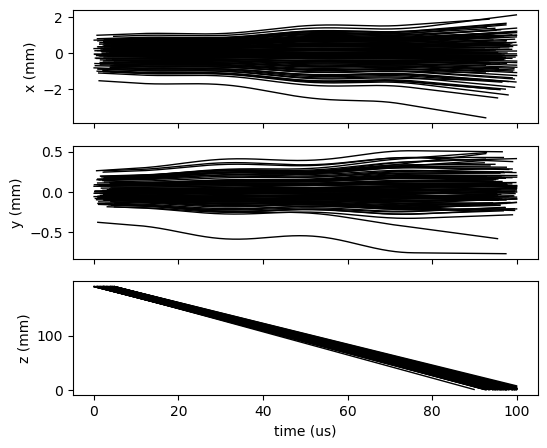

In [7]:
fig, ax = subplots(3, 1, figsize=(6, 5), sharex=true)

for tr in df
    ax[1, 1].plot(tr.t*1e6, tr.x*1e3, color="black", lw=1)
    ax[2, 1].plot(tr.t*1e6, tr.y*1e3, color="black", lw=1)
    ax[3, 1].plot(tr.t*1e6, tr.z*1e3, color="black", lw=1)
end

ax[1, 1].set_ylabel("x (mm)")
ax[2, 1].set_ylabel("y (mm)")
ax[3, 1].set_ylabel("z (mm)")
ax[3, 1].set_xlabel("time (us)")
;